In [44]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator, FormatStrFormatter
import numpy as np
import seaborn as sns

### Shipping Zone Cost calculation

In [148]:
large_basket_shipping_cost  = 150
shipping_base = 2
shipping_zones = [shipping_base]

for i in range(2, 8):
    new_shipping_cost = round(shipping_zones[-1] * 1.1,2)  # Increase previous zone by 10%
    shipping_zones.append(new_shipping_cost)

zone2 = shipping_zones[0]
zone3 = shipping_zones[1]
zone4 = shipping_zones[2]
zone5 = shipping_zones[3]
zone6 = shipping_zones[4]
zone7 = shipping_zones[5]
zone8 = shipping_zones[6]

# Shipping Dataframe

### Creating dataframe for Miami production site shipping rates according to the shipping zone rates by states

In [3]:
Mia_df = pd.DataFrame({'ID_state': list(range(0, 49)),
                        'Shipping_cost_mia': [(zone4+zone5)/2,zone8,zone5,zone8,zone7,zone6,zone6,zone6,(zone2+zone3+zone4)/3,zone4,zone8,zone6,(zone5+zone6)/2,zone6,zone6,zone5,zone5,zone7,zone6,zone6,zone6,zone7,zone5,zone6,zone8,zone7,zone8,zone6,zone6,zone7,zone6,zone5,(zone7+zone8)/2,(zone5+zone6)/2,zone6,zone8,zone6,zone6,zone4,zone7,zone5,zone6,zone8, zone6,zone5,zone8,zone5,(zone6+zone7)/2,zone8]
})

In [4]:
Mia_df.Shipping_cost_mia = round(Mia_df.Shipping_cost_mia,2)

### Creating dataframe for Phoenix production site shipping rates according to the shipping zone rates by states

In [5]:
Phx_df = pd.DataFrame({'ID_state': list(range(0, 49)),
                       'Shipping_cost_phx': [zone7,zone2,zone6,(zone3+zone4+zone5)/3,zone4,zone8,zone8,zone8,(zone7+zone8)/2,zone7,zone7,zone6,zone7,zone6,zone7,zone7,zone6,zone8,zone8,zone8,zone7,zone6,zone6,zone6,zone5,zone5,(zone3+zone4)/2,zone8,zone8,zone4,zone8,(zone7+zone8)/2,zone6,zone7,zone5,zone5,zone8,zone8,zone7,(zone5+zone6)/2,zone7,(zone4+zone5+zone6)/3,zone4,zone8,zone8,zone6,(zone7+zone8)/2,(zone7+zone6)/2,zone5]
})

In [6]:
Phx_df.Shipping_cost_phx = round(Phx_df.Shipping_cost_phx,2)

### Creating Shipping DataFrame

In [7]:
shipping_df = pd.read_csv('USA_population.csv')

In [9]:
shipping_df['Population_ratio'] =  round(shipping_df.Population / shipping_df.Population.sum(),4)

In [10]:
shipping_df = shipping_df.merge(Mia_df, on='ID_state')

In [11]:
shipping_df = shipping_df.merge(Phx_df, on='ID_state')

In [146]:
shipping_df['MinShipping'] = shipping_df[['Shipping_cost_mia', 'Shipping_cost_phx']].min(axis=1)
weighted_avg_shipping_cost = (shipping_df['Population_ratio'] * shipping_df['MinShipping']).sum() / shipping_df['Population_ratio'].sum()

print("Weighted Average Shipping Cost:", round(weighted_avg_shipping_cost,2))

Weighted Average Shipping Cost: 2.68


In [135]:
shipping_df.head(5)

,ID_state,State,Population,Population_ratio,Shipping_cost_mia,Shipping_cost_phx,MinShipping
0,0,Alabama,4893186,0.0151,2.54,3.22,2.54
1,1,Arizona,7174064,0.0221,3.54,2.00,2.00
2,2,Arkansas,3011873,0.0093,2.66,2.93,2.66
3,3,California,39346023,0.1213,3.54,2.43,2.43
4,4,Colorado,5684926,0.0175,3.22,2.42,2.42


## Product Base costs

In [13]:
product_fixed_cost = 1.75
product_variable_cost = 2.07
cogs = product_fixed_cost + product_variable_cost

# Price Simulations

In [311]:
avg_similar_product_price = 32.2
recommended_retail_price = avg_similar_product_price * 1.2 # Rough estimate - 20% higher since product is customized
TCG_wholesale_price_estimate = recommended_retail_price / 2 # Rough estimate - merchants can get 50% profit margin on a high margin product
merchOne_product_price = 19.50 # TCG_wholesale_price_estimate round up to 0.5

small_basket_price = merchOne_product_price * 0.95  #Product Discount 5% B2B small basket client
large_basket_price = merchOne_product_price * 0.9  #Product Discount 10% large basket client

estimated_base_supplier_price = TCG_wholesale_price / 2 #Rough estimate of how supplier price baseline
round

TCG_profit_margin_goal_percentage = 50 #My goal is to have 50% profit margin
optimal_negotiation_price = 5 #Based on manual simulations the supply price to ensure 50% profit margin with large-basket

TCG_profit_merchOne = merchOne_product_price - cogs - optimal_negotiation_price
TCG_profit_margin_merchOne = (TCG_profit_merchOne/merchOne_product_price)*100

TCG_profit_largebasket = large_basket_price - cogs - optimal_negotiation_price
TCG_profit_margin_largebasket = (TCG_profit_largebasket/large_basket_price)*100


print(TCG_profit_margin_largebasket)

49.743589743589745


### Supply price simulation

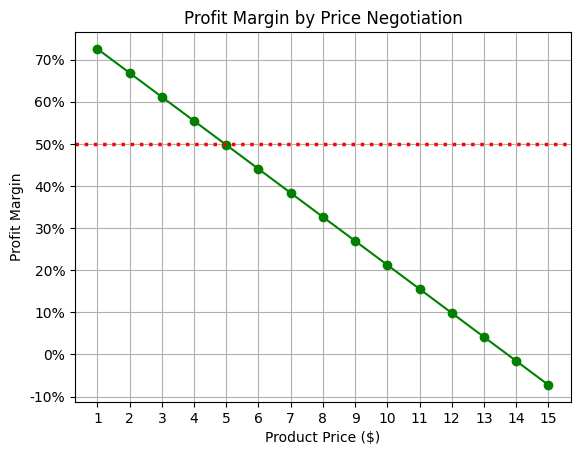

<Figure size 640x480 with 0 Axes>

In [309]:
supply_price_variants = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
profit_margin = [72.53,66.83,61.13,55.44,49.74,44.04,38.34,32.64,26.95, 21.25,15.55,9.85,4.15,-1.53,-7.23]

x = supply_price_variants
y = profit_margin

fig, ax = plt.subplots()
ax.plot(x, y, color='green', marker='o')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y/100)))

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

ax.axhline(y=50, color='red', linestyle='dotted',linewidth=2.5) #Profit margin aim of 50%

plt.title("Profit Margin by Price Negotiation")
plt.xlabel("Product Price ($)")
plt.ylabel("Profit Margin")
plt.grid()
plt.show()

plt.savefig('Profit Margin by Price Negotiation.png')

## Modelling

In [310]:
shipped_qty = range(1, 501)
shipping_model = pd.DataFrame({'Quantity': shipped_qty})

items_per_package = 3
cost_increase_per_set = 2.68
bulk_shipping_threshold = 19
additional_item_charge = 0.99
markup_percentage = 1.1  # 10%

import math

#Custom formula for setting the shipping costs by basket tiers
def calculate_shipping_price(quantity):    
    if quantity <= bulk_shipping_threshold:
        sets_of_three = math.ceil(quantity / items_per_package)
        shipping_price = weighted_avg_shipping_cost + (sets_of_three - 1) * cost_increase_per_set
    else:
        shipping_price = large_basket_shipping_cost
    
    return shipping_price

merchOne_website_shipping_first_item = 4.99
small_basket_additional_item_shipping = additional_item_charge * 0.95 #5% volume discount
small_basket_first_item_shipping = merchOne_website_shipping_first_item * 0.95 #5% volume discount

shipping_model['Shipping_Charge'] = shipping_model.loc[0, 'Shipping_Charge'] = small_basket_first_item_shipping
for i in range(1, bulk_shipping_threshold):
    shipping_model.loc[i,'Shipping_Charge'] = shipping_model.loc[i - 1, 'Shipping_Charge'] + small_basket_additional_item_shipping


# Calculate prices using the custom function
shipping_model['Shipping_Cost'] = round(shipping_model['Quantity'].apply(lambda x: calculate_shipping_price(x)),2)
shipping_model.loc[bulk_shipping_threshold:, 'Shipping_Charge'] = shipping_model.loc[bulk_shipping_threshold:, 'Shipping_Cost'] * markup_percentage
shipping_model['Profit_Margin_%'] = round(((shipping_model['Shipping_Charge'] - shipping_model['Shipping_Cost']) / shipping_model['Shipping_Charge']) * 100,1)

shipping_model['Cost_per_unit'] = round(shipping_model['Shipping_Cost'] / shipping_model['Quantity'],2)
shipping_model['Charge_per_unit'] = round(shipping_model['Shipping_Charge'] / shipping_model['Quantity'],2)
shipping_model['Shipping_profit_per_Unit'] = shipping_model['Charge_per_unit'] - shipping_model['Cost_per_unit']

shipping_model.tail(5)

,Quantity,Shipping_Charge,Shipping_Cost,Profit_Margin_%,Cost_per_unit,Charge_per_unit,Shipping_profit_per_Unit
495,496,165.0,150.0,9.1,0.3,0.33,0.03
496,497,165.0,150.0,9.1,0.3,0.33,0.03
497,498,165.0,150.0,9.1,0.3,0.33,0.03
498,499,165.0,150.0,9.1,0.3,0.33,0.03
499,500,165.0,150.0,9.1,0.3,0.33,0.03


In [300]:
shipping_model['cogs_per_unit'] = shipping_model.Quantity * cogs

In [301]:
def calculate_profit(row):
    if row['Quantity'] < 20:
        return row['Quantity'] * (small_basket_price - cogs - optimal_negotiation_price)
    else:
        return row['Quantity'] * (large_basket_price - cogs - optimal_negotiation_price)

shipping_model['Product_profit_per_unit'] = shipping_model.apply(calculate_profit, axis=1)

In [302]:
shipping_model['Total_profit'] = shipping_model['Shipping_profit_per_Unit'] + shipping_model['Product_profit_per_unit']

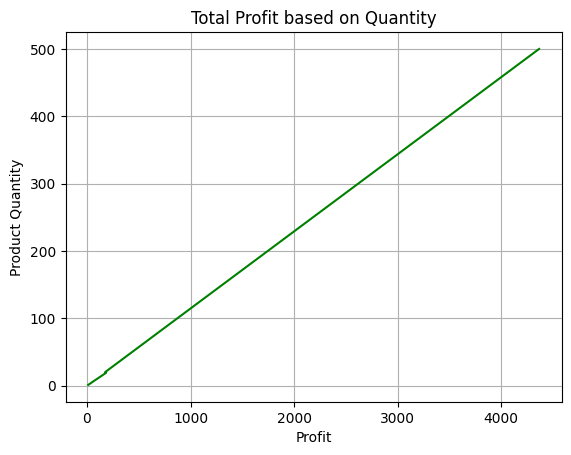

In [305]:
fig, ax = plt.subplots()
ax.plot(shipping_model['Total_profit'], df.Quantity, color='green')

plt.title("Total Profit based on Quantity")
plt.xlabel("Profit")
plt.ylabel("Product Quantity")
plt.grid()
plt.show()

#### Plotting the profit/loss per unit

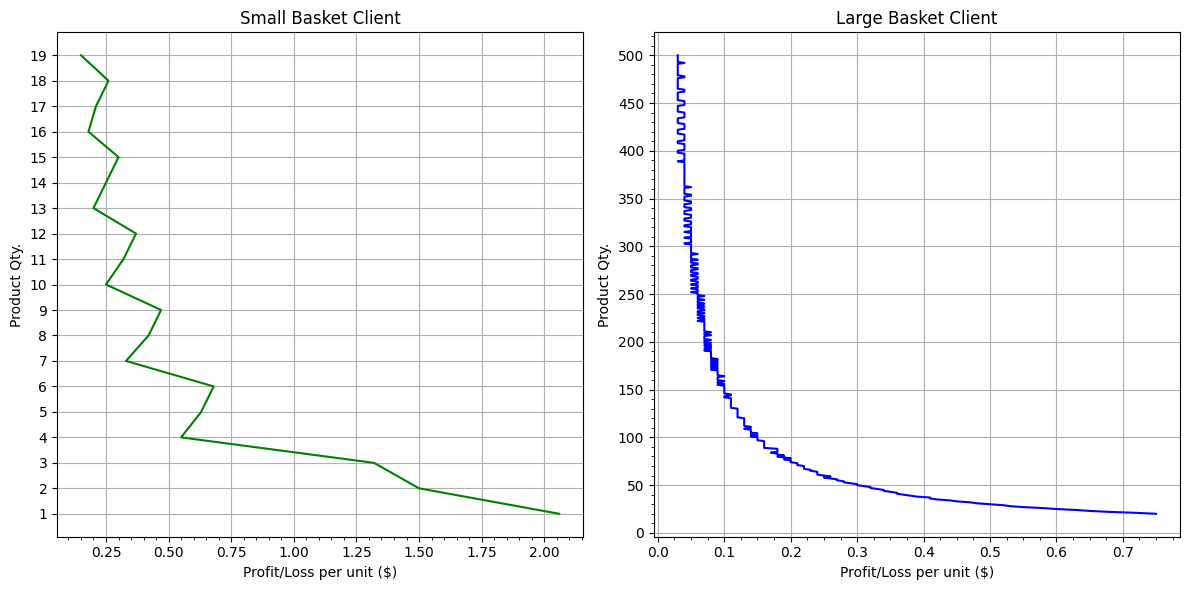

In [277]:
import matplotlib.ticker as ticker

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

small_basket_df = shipping_model[shipping_model['Quantity'] < 20]
large_basket_df = shipping_model[shipping_model['Quantity'] > 19]


ax1.plot(small_basket_df['Profit/Loss per Unit'], small_basket_df['Quantity'], color='green')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.25))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(base=0.05))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(base=1))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(base=1))
ax1.set_title("Small Basket Client")
ax1.grid()
ax1.set_xlabel("Profit/Loss per unit ($)")
ax1.set_ylabel("Product Qty.")

ax2.plot(large_basket_df['Profit/Loss per Unit'], large_basket_df['Quantity'], color='blue')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=0.10))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(base=0.025))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(base=50))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(base=10))
ax2.set_title("Large Basket Client")
ax2.grid()
ax2.set_xlabel("Profit/Loss per unit ($)")
ax2.set_ylabel("Product Qty.")

plt.tight_layout()
plt.show()

In [282]:
avg_shipping_profit_margin_small_basket = small_basket_df['Profit_Margin_%'].mean()
avg_shipping_profit_margin_large_basket = large_basket_df['Profit_Margin_%'].mean()
print('The average shipping profit margin % for small basket client:', round(avg_shipping_profit_margin_small_basket,1))
print('The average shipping profit margin % for large basket client:', round(avg_shipping_profit_margin_large_basket,1))

The average shipping profit margin % for small basket client: 29.2
The average shipping profit margin % for large basket client: 9.1
